<a href="https://colab.research.google.com/github/Asifbbl/Zomato-Resturent-Clustering-and-Sentiment-Analysis/blob/main/Zomato_resturent_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :- Zomato Resturent Clustering and Sentiment Analysis**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** - Asif Ansari
##### **Team Member 2 -** - Anand Kumar

# **Project Summary -**

# **GitHub Link -**

GitHub Link - https://github.com/Asifbbl/Zomato-Resturent-Clustering-and-Sentiment-Analysis

# **Problem Statement**


Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Library
import pandas as pd 
import numpy as np

# Import Visuliztion Library
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud



# Annomly Detection Tools
from sklearn.ensemble import IsolationForest

In [ ]:
# Import Libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Resturent Dataset
path1 =('/content/drive/MyDrive/Zomato Project/Zomato Restaurant names and Metadata.csv')
resturent_df=pd.read_csv(path1)
# Load Review Dataset
path2 = ('/content/drive/MyDrive/Zomato Project/Zomato Restaurant reviews.csv')
review_df = pd.read_csv(path2)


### Dataset First View

In [ ]:
# Dataset First Resturent Data file
resturent_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# Dataset First of review df 
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count in Resturent Dataset
print(f' The number of Row and Column int the  Resturent Dataset {resturent_df.shape}')

 The number of Row and Column int the  Resturent Dataset (105, 6)


In [ ]:
# Dataset Row & Columns count in Review Dataset
print(f'The number of Row and Column in the Review Data  {review_df.shape}')

The number of Row and Column in the Review Data  (10000, 7)


### Dataset Information

All the Variables persent in Zomato Restaurant names and Metadata 

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost for Dinning

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines(Type of food) served by Restaurants

6. Timings : Restaurant Timings

All the Variables persent in Zomato Review Dataset

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [ ]:
# Dataset Information of Resturent
resturent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
# Dataset Information of Review
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count resturent columns
print(f'Number of duplicte item persent in Resturent dataset =  {resturent_df.duplicated().sum()} \n')

print('--'*50)


# Dataset Duplicate Values Count review column
print(f'Number of duplicte item persent in Review dataset = {review_df.duplicated().sum()}')


Number of duplicte item persent in Resturent dataset =  0 

----------------------------------------------------------------------------------------------------
Number of duplicte item persent in Review dataset = 36


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values 
print('---Null values persent int the Resturent dataset---')
print(resturent_df.isnull().sum(), '\n')

print('--'*50)

# Missing Values/Null Values Count
print('---Null values persent int the Resturent dataset---')
print(review_df.isnull().sum())

---Null values persent int the Resturent dataset---
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

----------------------------------------------------------------------------------------------------
---Null values persent int the Resturent dataset---
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'All the Missing values persent in Resturent columns are \n')

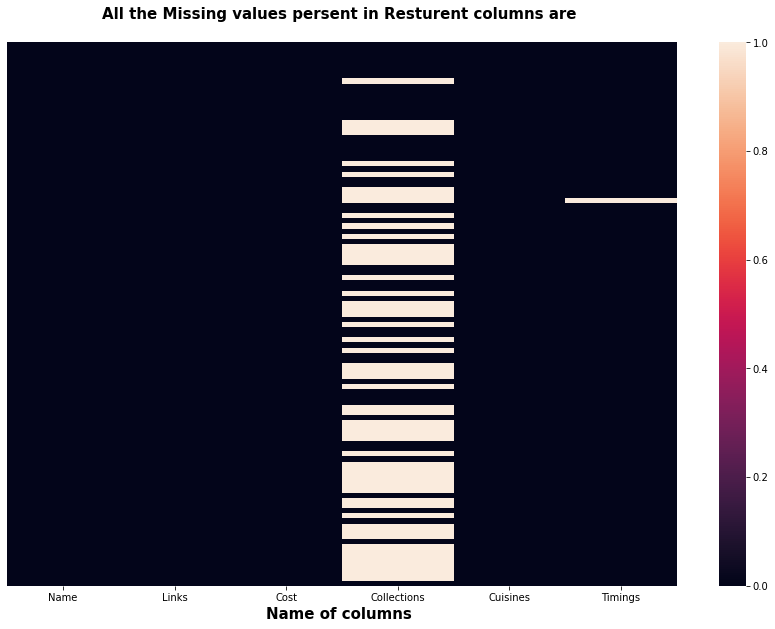

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(resturent_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values persent in Resturent columns are \n', fontweight= 'bold', size=15)

Text(0.5, 1.0, 'All the Missing values persent in Review columns are \n')

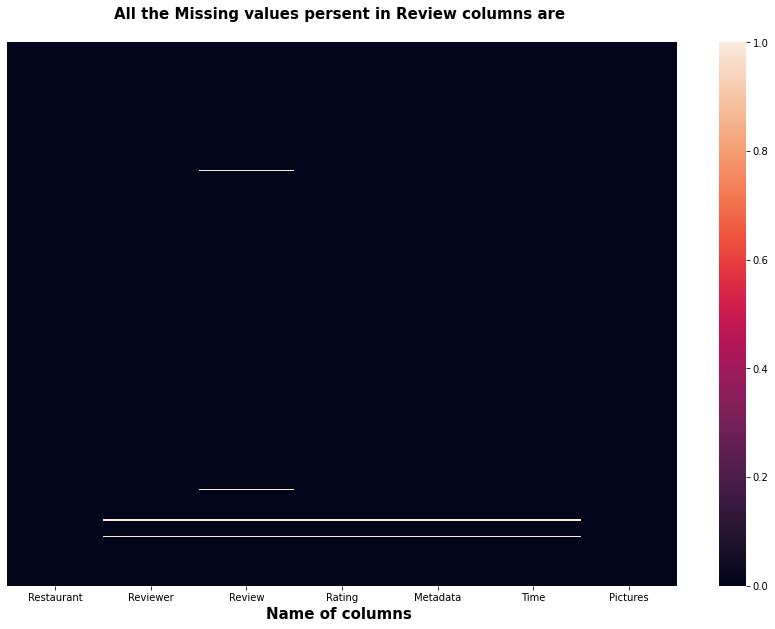

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,10))
sns.heatmap(review_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values persent in Review columns are \n', fontweight= 'bold', size=15)

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different Variable/features.

* Collection Variable have high volume of null values persent and timing also has null values.

* There is no duplicate value persent in the resturent dataset.

* Cost feature represent the amount but it shows object type because it is saperated by ',' comma

* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 Variable/features.

* Only picture and restaurant feature does not have null value from .

* There are total of 36 duplicate values persent in the review dataset

* Rating represent ordinal data, has object data type should be integer.

* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f' The columns persent in the Resurent dataset \n')

print(resturent_df.columns.to_list() ,'\n')
print('--'*50 )
print(f'\n The columns persent in review dataset \n')
print(review_df.columns.to_list())

 The columns persent in the Resurent dataset 

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'] 

----------------------------------------------------------------------------------------------------

 The columns persent in review dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe
resturent_df.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


In [ ]:
# Dataset Describe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print('Number of unique variable persent in the Resturent dataset')
print(resturent_df.nunique())

print('--'*50)
print('Number of unique variabele persent in Review dataset')
print(review_df.nunique())

Number of unique variable persent in the Resturent dataset
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64
----------------------------------------------------------------------------------------------------
Number of unique variabele persent in Review dataset
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [ ]:
# Code to find unique item in each variable of Resturent dataset
for col in resturent_df.columns.tolist():
  print(f' The Uniue values of  Resturent dataset varibles -- {col} = \n \n',  resturent_df[col].unique(),'\n')
  print('--'*50)

 The Uniue values of  Resturent dataset varibles -- Name = 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitche

In [ ]:
# Code to find unique item in each variable of Resturent dataset
for col2 in review_df.columns.tolist():
  print(f'The Uniue values persent in  {col2} : \n \n {review_df[col2].unique()} \n')
  print('--'*50)

The Uniue values persent in  Restaurant : 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom'

## 3. ***Data Wrangling***

Data wrangling can be defined as the process of cleaning, organizing, and transforming raw data into the desired format for analysts to use for prompt decision-making. Also known as data cleaning or data munging, data wrangling enables businesses to tackle more complex data in less time, produce more accurate results, and make better decisions. The exact methods vary from project to project depending upon your data and the goal you are trying to achieve. More and more organizations are increasingly relying on data wrangling tools to make data ready for downstream analytics.

### Data Wrangling Code

#### Wrangling Resturent  Dataset:

Wrangling on Cost feature/variable

In [ ]:
# Write your code to make your dataset analysis ready.
resturent_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Remove the ',' from the cost varible 
resturent_df['Cost']= resturent_df['Cost'].str.replace(',','').astype('int64')

In [ ]:
# Find out the  top 10 costly resturent 
Top_10_Expensive_Restuent=resturent_df.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restuent

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [ ]:
# Find out 10 economicaly  resturent 
Top_10_cheapest_resturent=resturent_df.sort_values('Cost', ascending=True)[['Name', 'Cost']][:10]
Top_10_cheapest_resturent

,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


Wrangling on Collection feature/variable

In [ ]:
# spliting the Collection and storing in list 
Collections_list = resturent_df.Collections.dropna().str.split(', ')

In [ ]:
# storing all the cusines in a dict 
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:  
            Collections_dict[col_name]=1 

In [ ]:

# converting the dict to a data frame 
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})
     

In [ ]:
#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4


Wrangling on Cuisine variable

In [ ]:
# store type of food in a a list with spliting all the food
cuisine_list =resturent_df.Cuisines.str.split(', ')

In [ ]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [ ]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})

In [ ]:

#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


### Review :

Wrengling on Rating variable/Feature

In [ ]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [ ]:
# convert Like into nan and type  of data
review_df.loc[review_df['Rating']=='Like']=np.nan
review_df['Rating']= review_df['Rating'].astype('float')

# Fill Null values by mean
review_df['Rating'].fillna(3.5, inplace=True)
review_df['Rating'].unique()


array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

Wrengling on Metadata variable/Feature

In [ ]:
# split metadata column into 2 columns i.e. Reviews and followers

review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

# Drop the Metadata columns
review_df = review_df.drop(['Metadata'], axis =1)
review_df.head()

<ipython-input-36-1a438cc36939>:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str


,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0


In [ ]:
# Split the Time columns into Year Month and Hours
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
# code to find top reviewer
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [ ]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_10_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_10_reviewers_ratings=review_ratings[:10]
top_10_reviewers_ratings=top_10_reviewers_ratings.sort_values(by = 'Average_Ratings',ascending=False)
top_10_reviewers_ratings.head(10)

,Reviewer,Review_Count,Average_Ratings
2,Kiran,12,4.500000
4,Vedant Killa,11,4.000000
7,Sravani,10,4.000000
0,Ankita,13,3.923077
3,Jay Mehta,11,3.727273
8,Manojkumar D Nambisan,10,3.700000
5,Siva Kumar,10,3.600000
9,Age Of Foodies (Suraj Karambe),10,3.500000
1,Parijat Ray,13,3.192308
6,Priyanka,10,2.600000


In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#Finding the most followed critic
most_followed_reviewer = review_df.groupby('Reviews').agg({'Reviewer':'max','Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Followers', ascending = False)
most_followed_reviewer[:10]

,Reviews,Reviewer,Followers,Average_Rating_Given
165,186.0,Satwinder Singh,13410.0,3.666667
60,60.0,Tirtha Das,13320.0,3.852941
8,8.0,Yaksh. Pgpm16c,11329.0,3.663842
31,31.0,Syed Ghouse Mohiuddin,9494.0,3.979167
34,34.0,Yashmita Hota,7628.0,3.907407
30,30.0,The Binge Journal,7589.0,3.794872
98,98.0,Vineet R,6931.0,3.071429
35,35.0,Ujj,5873.0,4.102941
63,63.0,Vibhor Dhote,5715.0,3.868421
129,130.0,YatenJaiswal,5533.0,3.750000


In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [ ]:
#merging both data frame
resturent_df = resturent_df.rename(columns = {'Name':'Restaurant'})
merged_df = resturent_df.merge(review_df, on = 'Restaurant')
merged_df.shape

(9999, 16)

In [ ]:
merged_df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


### What all manipulations have you done and insights you found?

Firstly, We have started with changing the datatype of the variable persent in the dataset like cost and rating. this will help to make data consistent.



*   We have found 10 Expensive Resturent from the top and top 10 cheapest Resturent.  


*   Divide the Metadata variable into two varilable ie Review and Followers


*   Top 10 Collection and Top 10 Cuisine  


*   Splited the Time Variable into new variable like Year Month and Hours


*   We have found top 10 reviewer and the average rating of the reviewer.


*   Top 10 most which have highest number of follower


*   Merge the Resturent and Review variable with Name and resturent





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  Distrbution plot of Cost, Rating, Year 

<ipython-input-45-6100cdec70fa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-45-6100cdec70fa>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df[col], color = '#055E85');
<ipython-input-45-6100cdec70fa>:6: UserWarning: 

`distplot` i

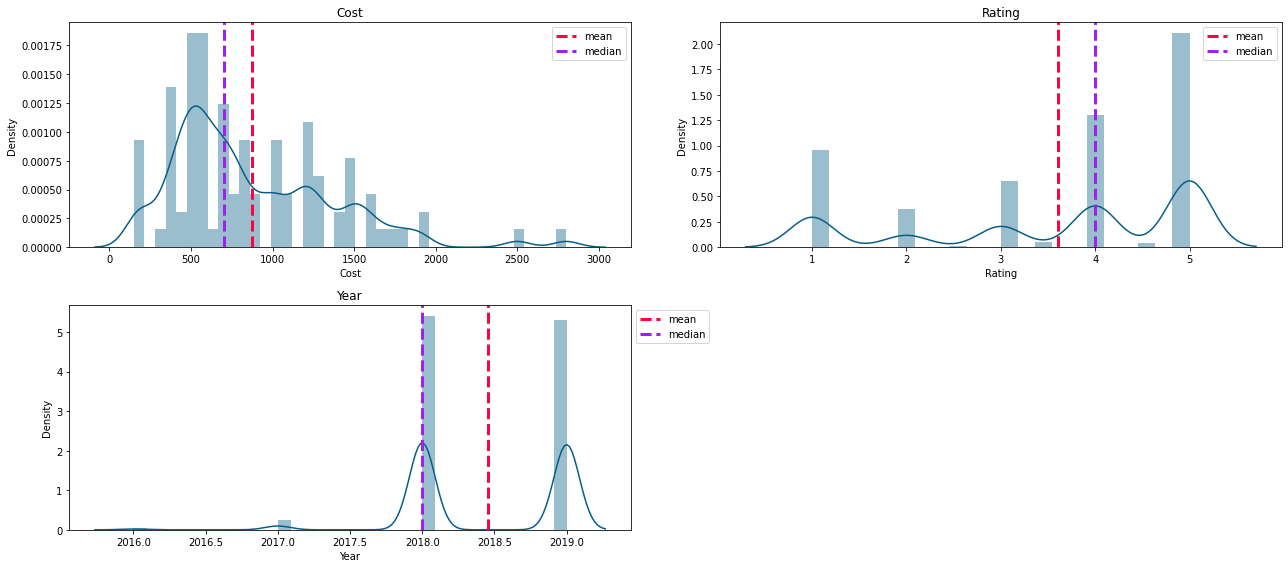

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

We have pick up Distplot which is helpful for understanding the distribution of the Distplot is helpful in understanding the distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the distplot we have found that all three variable persent have some skewness persent into it and Maximum resturent show the price range of 500 and 2018 and 2019 have high volume of review found.

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From the Given distplot we have found important information ie Cost which makes high impect on business along with rating which show how much the person is engaged with the product. 

#### Chart - 2  Top 10 Expensive Reaturent

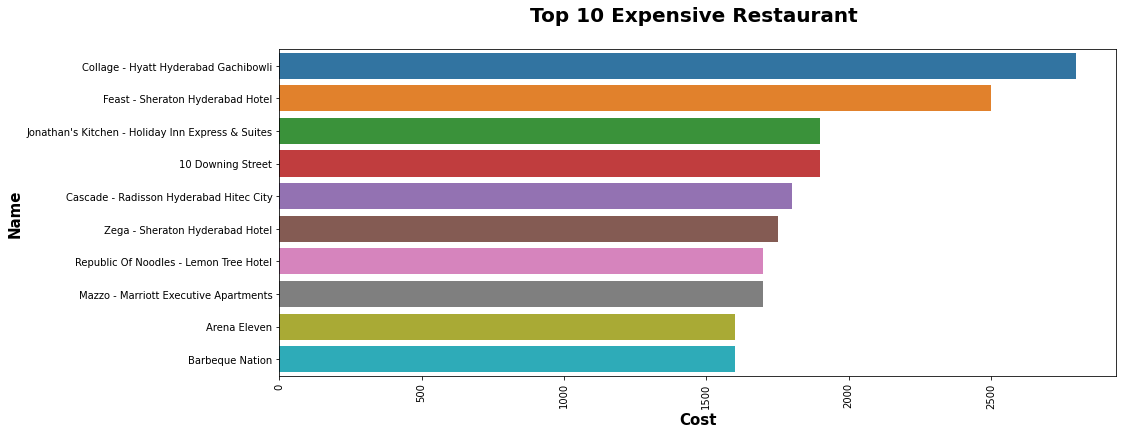

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent
# Top 10 Expensive Restaurants
plt.figure(figsize=(15,6))
x = Top_10_Expensive_Restuent['Cost']
y = Top_10_Expensive_Restuent['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

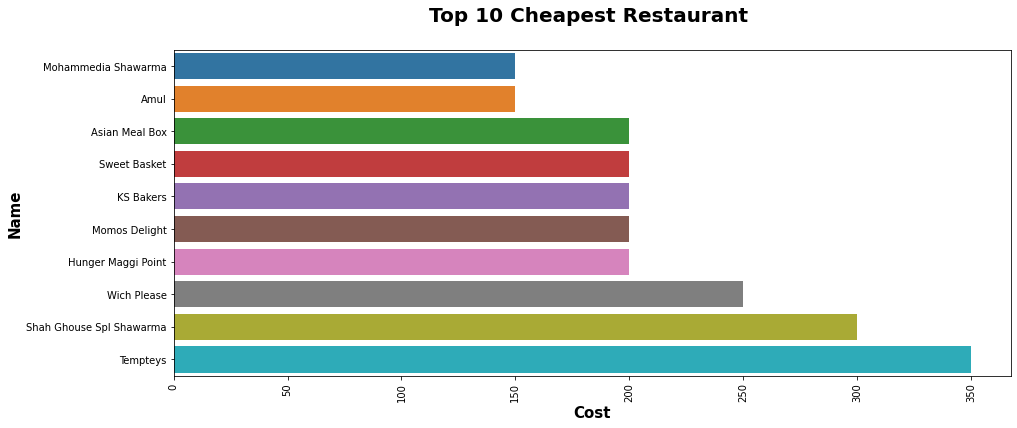

In [ ]:
# Chart - 1 visualization code fro Top 10 Expensive Reaturent

plt.figure(figsize=(15,6))
x = Top_10_cheapest_resturent['Cost']
y = Top_10_cheapest_resturent['Name']
plt.title("Top 10 Cheapest Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Expensive and Cheapest resturent.

##### 2. What is/are the insight(s) found from the chart?

From the given chart we have found top 10 expensive and cheapest resturent from th given dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insigh we get from the given barchart will make high impect in business because it helps us n making the decision financially.

#### Chart - 3  :    Top 5 Tagg Resturent

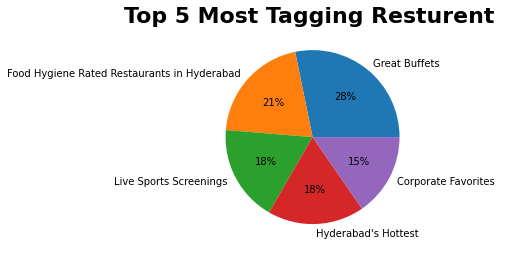

In [ ]:
# Chart - 2 visualization code pie chart for top 5 Tagging Resturent

collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that from the top 5 'Tags' there are **28%** of them belong to **'Great Buffets'**, **21%** of them belong to **Food Hygiene Rated Resturents in Hyderabad** , **18%** of them are **Hydrabad's Hottest** and **15%** are **Corporate Favorites**.

#### Chart - 4   : WordCloud for Colllections

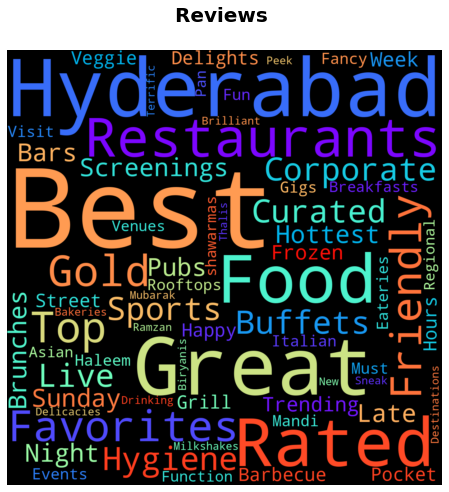

In [ ]:

# Chart - 4 WordCloud for Colllections
# Storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in Collections_df.Tags )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, 
                      colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Reviews \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like Hydrabad, Best, Great Food, Favorities, Rated etc 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 5   :    Top 5 most selling Cuisine

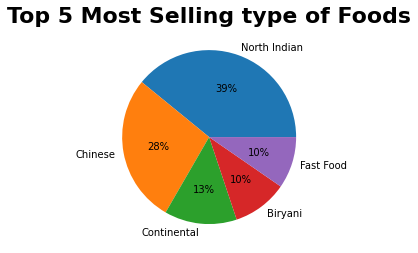

In [ ]:
# Chart - 5 visualization code pie chart for top 5 most selling cuisine
cuisine_list = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Type_of_Food'].tolist()[:5]
data = cuisine_df.sort_values('Number_of_Restaurants', ascending = False)['Number_of_Restaurants'].tolist()[:5]
labels = cuisine_list

#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Selling type of Foods', size =22, weight ='bold', )
plt.show()

##### 1. Why did you pick the specific chart?

We have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart We got to know that important information ie the top **5 Cusine**' there are **39%** of them belong to **North Indian**, **28%** of them belong to **Chinese** , **13%** of them are **Continental** and **10%** are belong to **Biryani** and **10%** are belong to Fast Food.

#### Chart - 6 Wordcloud for Cuisine

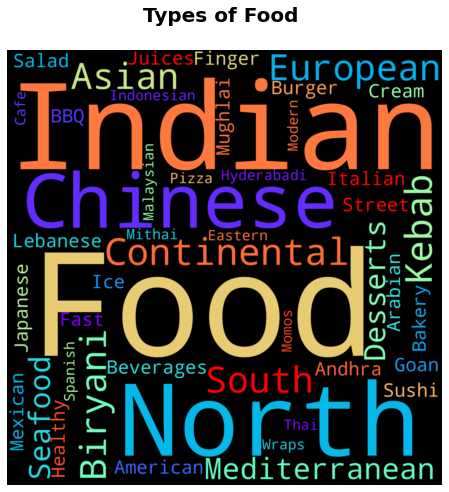

In [ ]:
# Chart - 6 wordcloud for Cuisine
# storind all cuisine in form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Type_of_Food )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000, collocations = False, colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Types of Food \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like North, Indian, Food, Chinees, Biryani etc 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 7  :  Top 10 Reviewers and Their Review

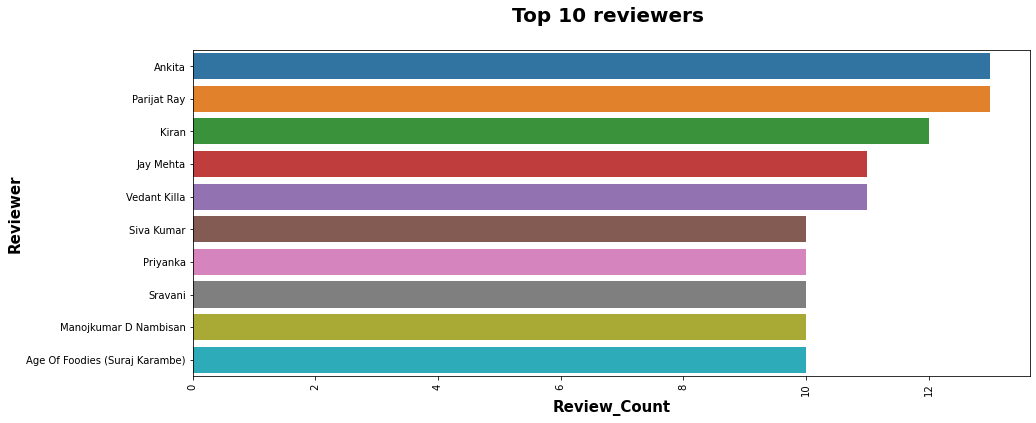

In [ ]:
# top reviewers that have more review
plt.figure(figsize=(15,6))
x = top_10_reviewers['Review_Count']
y = top_10_reviewers['Reviewer']
plt.title("Top 10 Reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("No. of Reviews",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

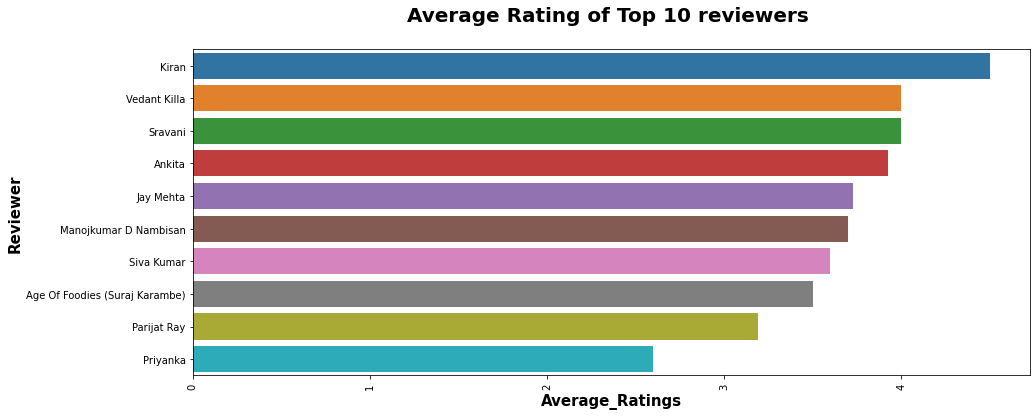

In [ ]:
# Average rating of top reviewers
plt.figure(figsize=(15,6))
x = top_10_reviewers_ratings['Average_Ratings']
y = top_10_reviewers_ratings['Reviewer']
plt.title("Average Rating of Top 10 reviewers \n",fontsize=20, weight='bold')
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Rating",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Reviews and their Average Review.

##### 2. What is/are the insight(s) found from the chart?

From the given braplot we have found top 10 Reviewers and their review are importent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The Review of these top Reviewer is important because they have good knowledge about the that things so from thier review company can improve their quality which lead to growth in their business.

#### Chart - 8 : Most Followed Reviewer

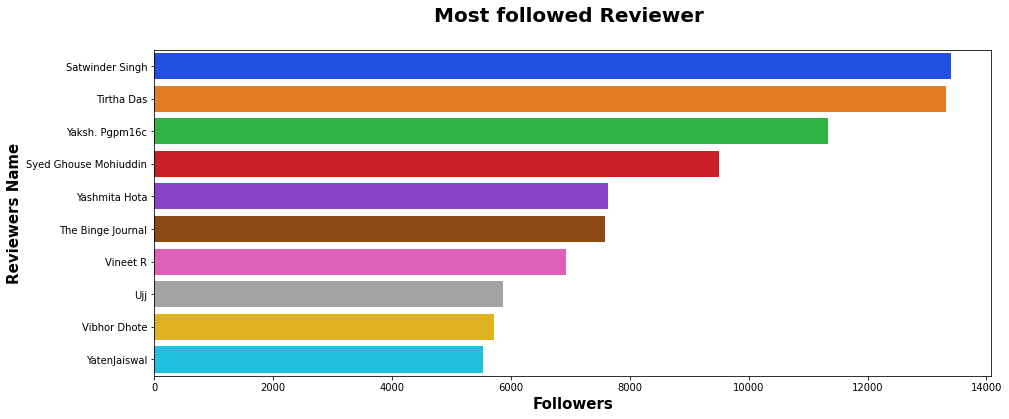

In [ ]:
# visualization code for most review follower
plt.figure(figsize=(15,6))
sns.barplot(data = most_followed_reviewer[:10], x = 'Followers', y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer \n',fontsize=20, weight = 'bold')
plt.ylabel("Reviewers Name",weight='bold',fontsize=15)
plt.xlabel("Followers",weight='bold',fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

We have chosen chosen bar plot to find the Reviewers Name and Their Follower

##### 2. What is/are the insight(s) found from the chart?

From the given chart we have found top 10 Reviewer Name on the basis of follower basis from the given dataset.

#### Chart - 9 :    Word cloud for Review

(-0.5, 1399.5, 1399.5, -0.5)

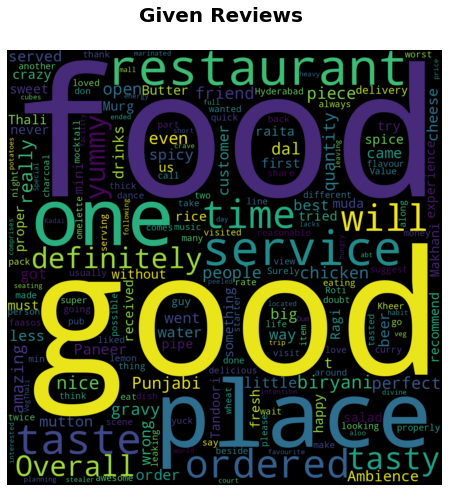

In [ ]:
#Creating word cloud for reviews
plt.figure(figsize=(15,8))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.title('Given Reviews \n',fontsize=20, weight = 'bold')
plt.axis("off")

##### 1. Why did you pick the specific chart?

We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

##### 2. What is/are the insight(s) found from the chart?

From the given Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like Food, Good, Place, Resturent so on. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The given Word chart helps in Advertisement which directly import on business which helps to analyse.

#### Chart - 10 - Correlation Heatmap

<Axes: >

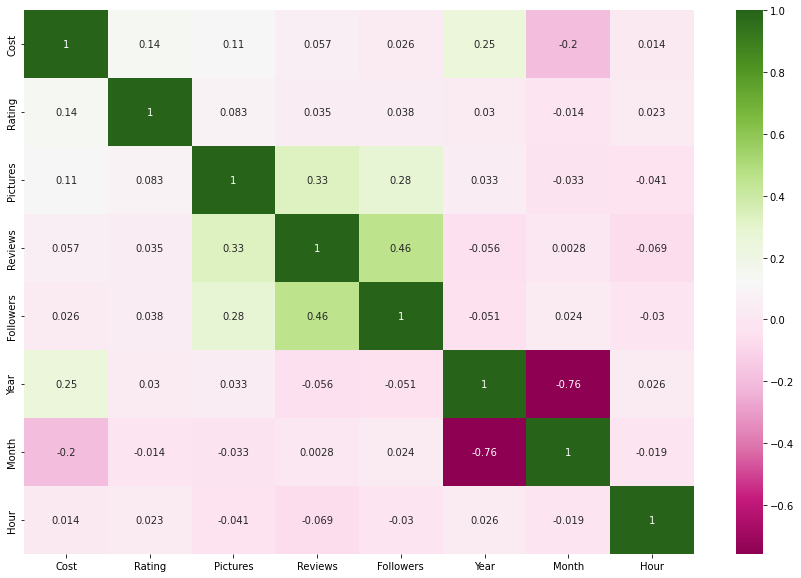

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(merged_df.corr(), cmap ='PiYG', annot = True)

##### 1. Why did you pick the specific chart?

We have pick up this heatmap chart to find insights to analyse that how the given one variable are the corelation to another variable.

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 11 - Pair Plot 

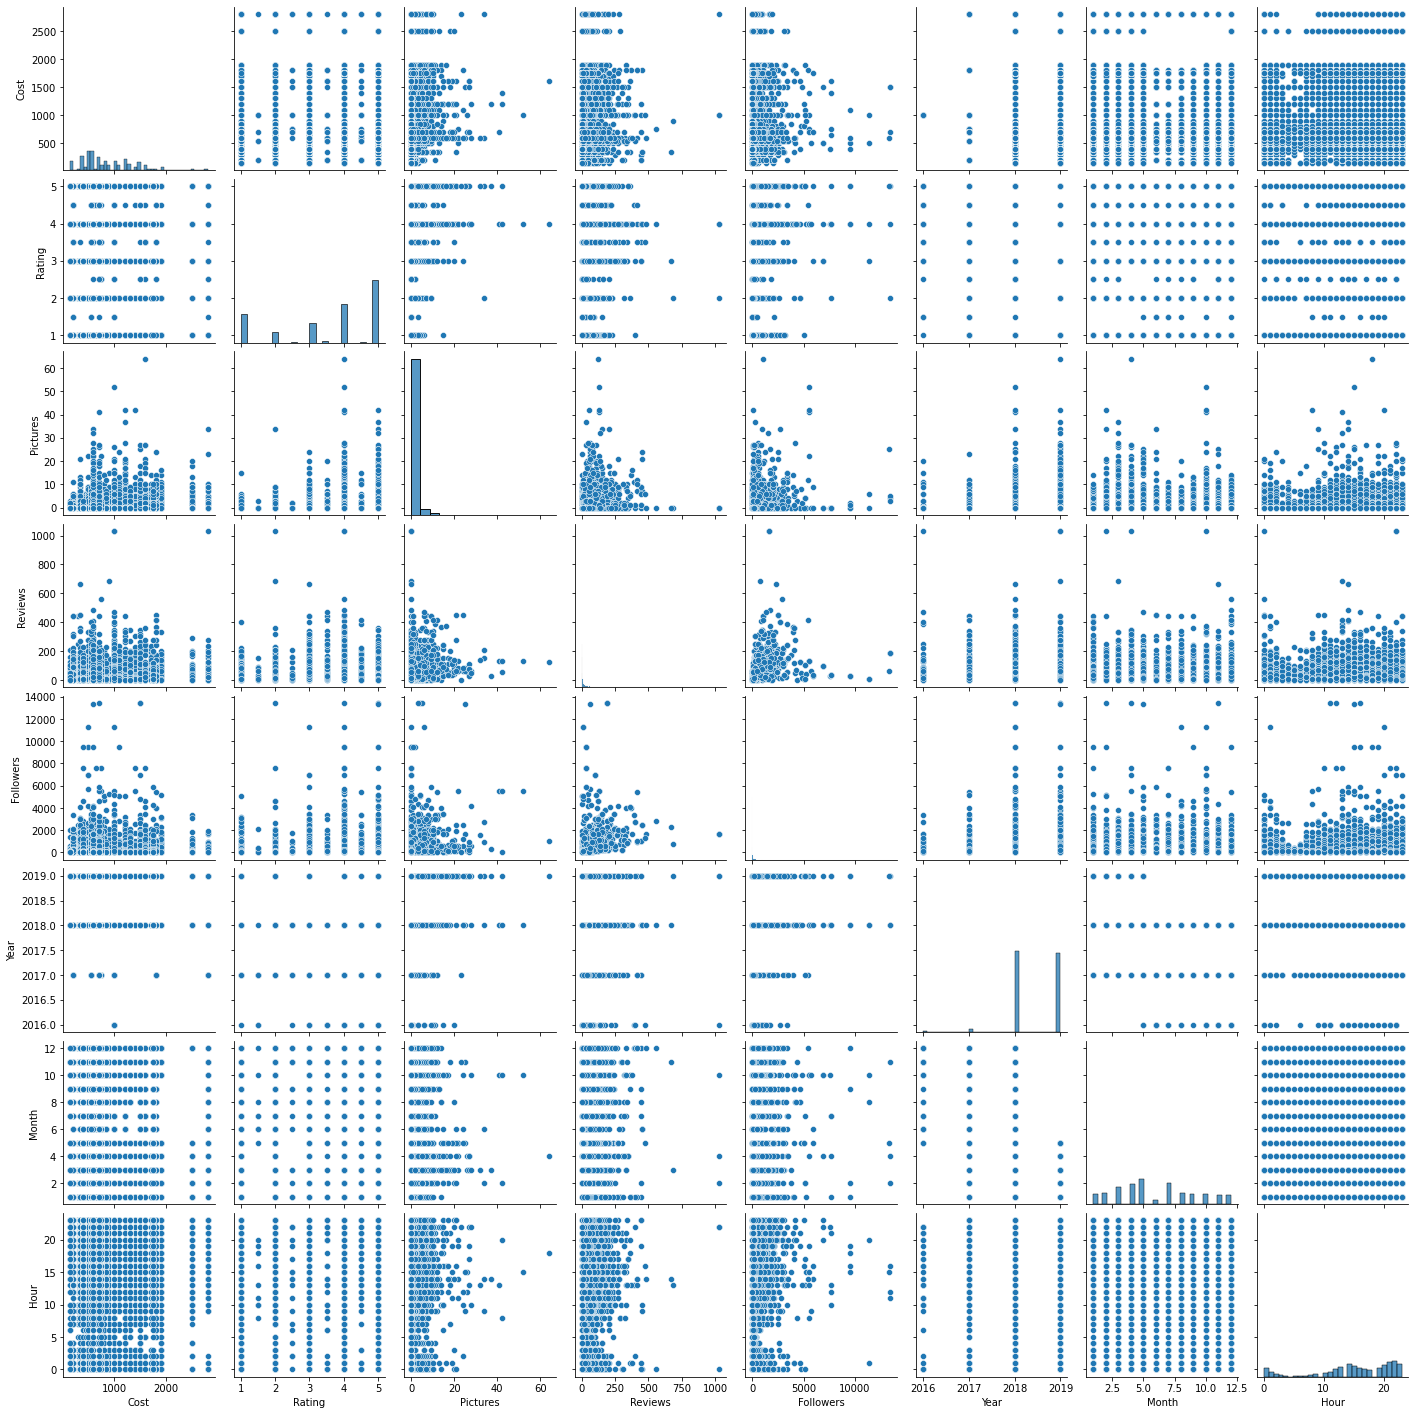

In [ ]:
# Pair Plot visualization code
sns.pairplot(merged_df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.

* Restaurants that are reviewed by reviewers with more followers will have a higher rating.

* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0) 
* Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Followers', data = merged_df).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used Simple Linear Regression Test.

##### Why did you choose the specific statistical test?

I choose this test because it is a straightforward method for testing the relationship between two continuous variables. It assumes that there is a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating) and it allows us to estimate the strength and direction of that relationship. It also allows us to test the null hypothesis that there is no relationship between the two variables by testing the p-value of the coefficient of the independent variable.

### Hypothetical Statement - 3

Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [ ]:
pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])[:1]

Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating. 

##### Why did you choose the specific statistical test?

 I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Heandle Duplicate Values from the dataset

In [ ]:
# Check the duplcate values persent in the data set
print(f'Total number of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total number of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total number of Duplicate Value persent in Restuent datast set 0 

Total number of Duplicate Value persent in Review datast set 36


In [ ]:
# Drop Duplicate values from the dataset

review_df.drop_duplicates(inplace= True)

# check the duplcate value after drop

print(f'Total numer of Duplicate Value persent in Restuent datast set {resturent_df.duplicated().sum()} \n')
print(f'Total numer of Duplicate Value persent in Review datast set {review_df.duplicated().sum()}')

Total numer of Duplicate Value persent in Restuent datast set 0 

Total numer of Duplicate Value persent in Review datast set 0


### Handle Missing values from Resturent Dataset

In [ ]:
# Handling Missing Values & Missing Value Imputation
resturent_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [ ]:
# Fill null values with mode 
resturent_df.Timings.fillna(resturent_df.Timings.mode()[0],inplace=True)

In [ ]:
# check percentage of missing values  in Collections

missing_percentage = ((resturent_df['Collections'].isnull().sum())/(len(resturent_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')

Percentage of missing value in Collections is 51.43%


In [ ]:
# More then 50% of the data is missing so we are droping the colllection collumns
resturent_df.drop('Collections', axis=1, inplace = True)
resturent_df.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

### Handle Missing values from Resturent Dataset

In [ ]:
review_df.isnull().sum()

Restaurant       1
Reviewer         3
Review          10
Rating           0
Time             3
Pictures         1
Reviews          3
Followers     1581
Year             3
Month            3
Hour             3
dtype: int64

In [ ]:
review_df[review_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,3.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
review_df['Restaurant'].dropna(inplace = True)


In [ ]:
review_df = review_df.dropna(subset=['Restaurant','Reviewer','Reviews'])
review_df.isnull().sum()

Restaurant       0
Reviewer         0
Review           7
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1578
Year             0
Month            0
Hour             0
dtype: int64

In [ ]:
#filling null values in review and reviewer follower column
review_df = review_df.fillna({"Review": "No Review", "Followers": 0})
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Hour          0
dtype: int64

In [ ]:
# Merge Both Dataset 
merge_df= resturent_df.merge(review_df, on = 'Restaurant')
merge_df.shape

(9961, 15)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

#### Anamoly Detection 

In [ ]:
#Anamoly detection 
from sklearn.ensemble import IsolationForest
#checking for normal distribution 
print("Skewness - Cost: %f" % merge_df['Cost'].skew())
print("Kurtosis - Cost: %f" % merge_df['Cost'].kurt())
print("Skewness - Followers: %f" % merge_df['Followers'].skew())
print("Kurtosis - Followers: %f" % merge_df['Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Followers: 10.092703
Kurtosis - Followers: 151.312960


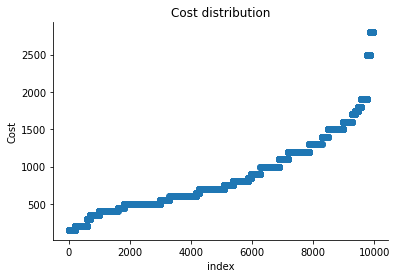

In [ ]:
# Scatter Plot of Cost 
plt.scatter(range(merge_df.shape[0]), np.sort(merge_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()

<ipython-input-75-ab61154a43bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Cost'])


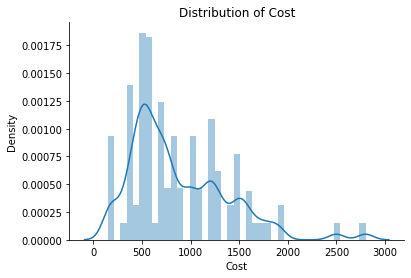

In [ ]:
#distribution of cost
sns.distplot(merge_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()

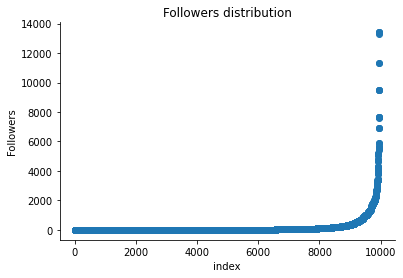

In [ ]:
#plot for reviewer follower
plt.scatter(range(merge_df.shape[0]), np.sort(merge_df['Followers'].values))
plt.xlabel('index')
plt.ylabel('Followers')
plt.title("Followers distribution")
sns.despine()

<ipython-input-77-8112ca6183a2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merge_df['Followers'])


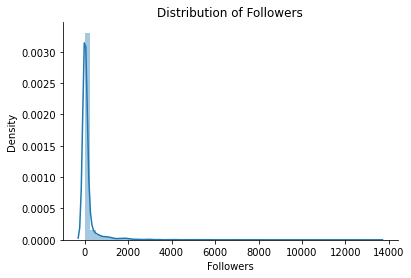

In [ ]:
#distribution of Reviewer_Followers
sns.distplot(merge_df['Followers'])
plt.title("Distribution of Followers")
sns.despine()

In [ ]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merge_df['Cost'].values.reshape(-1, 1))
merge_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merge_df['Cost'].values.reshape(-1, 1))
merge_df['outlier_univariate_Cost'] = isolation_forest.predict(merge_df['Cost'].values.reshape(-1, 1))

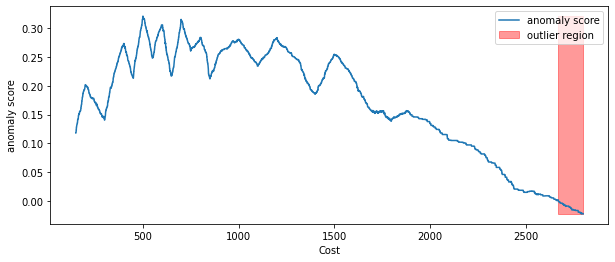

In [ ]:
#chart to visualize outliers
xx = np.linspace(merge_df['Cost'].min(), merge_df['Cost'].max(), len(merge_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [ ]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merge_df['Followers'].values.reshape(-1, 1))
merge_df['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merge_df['Followers'].values.reshape(-1, 1))
merge_df['outlier_univariate_follower'] = isolation_forest.predict(
    merge_df['Followers'].values.reshape(-1, 1))

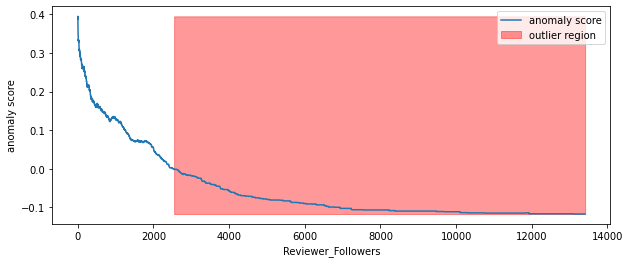

In [ ]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merge_df['Followers'].min(), merge_df['Followers'].max(), len(merge_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

####Treating Outlier

In [ ]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merge_df.describe().columns:
  if abs(merge_df[i].mean()-merge_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour']


In [ ]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
resturent_df.loc[resturent_df['Cost']<= outlier_treatment_skew(df=resturent_df, feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=resturent_df,feature='Cost')[1]

#upper limit capping
resturent_df.loc[resturent_df['Cost']>= outlier_treatment_skew(df=resturent_df, feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=resturent_df,feature='Cost')[0]


# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review_df.loc[review_df['Followers']<= outlier_treatment_skew(df=review_df,feature='Followers')[1], 'Followers']=outlier_treatment_skew(df=review_df,feature='Followers')[1]

#upper limit capping
review_df.loc[review_df['Followers']>= outlier_treatment_skew(df=review_df, feature='Followers')[0], 'Followers']=outlier_treatment_skew(df=review_df,feature='Followers')[0]

In [ ]:
#dropping the columns created while outliers treatment
merge_df.drop(columns =['anomaly_score_univariate_Cost','outlier_univariate_Cost','anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

In [ ]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
resturent_df = resturent_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
resturent_df.head(1)

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = resturent_df[['Restaurant','Cuisines']]

#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")


#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

<ipython-input-87-9a75dafc6e7c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')


In [ ]:
#total cuisine count 
resturent_df['Total_Cuisine_Count'] = resturent_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
resturent_df.head()

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5


In [ ]:
cluster_dummy.head(2)

,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,10 Downing Street,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13 Dhaba,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#adding cost column to the new dataset 
cluster_dummy = resturent_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.shape


(100, 46)



---

Alternate Method for creating dummies

In [ ]:
#creating data frame for categorial encoding
cluster_df = resturent_df[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

In [ ]:
#creating new dataframe for clustering 
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns 
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
#result from encoding
cluster_df.head(2).T

,0,1
Restaurant,Beyond Flavours,Paradise
Cuisines,"Chinese, Continental, Kebab, European, South I...","Biryani, North Indian, Chinese"
Cost,800.0,800.0
Average_Rating,4.28,4.7
Total_Cuisine_Count,6.0,3.0
Chinese,1,1
Continental,1,0
Kebab,1,0
European,1,0
South Indian,1,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
# analysing five random sample
sentiment_df.sample(5)

,Reviewer,Restaurant,Rating,Review
2626,Sogathur Balaji,Mustang Terrace Lounge,1.0,The place was good and the ambience felt nice ...
1248,Archisman Das,Absolute Sizzlers,5.0,"Food was too good, tried spicy chicken sizzler..."
2881,Venkat Varma Indukuri,Behrouz Biryani,2.0,Ordered Lazeez Bhuna Murgh Biryani (Boneless)....
4168,Gourav Parihar,Karachi Bakery,5.0,Good behavior of the delivery guy.
5016,PRINCE GUPTA,Gal Punjab Di,5.0,"Good ambiance and song playlist 😀, excellent p..."


In [ ]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index


sentiment_df.sample(5)



,index,Reviewer,Restaurant,Rating,Review
3816,3816,Sasha,The Glass Onion,5.0,The best pizza I have ever had !! You will fal...
8898,8898,Vishnu Prasad,Mohammedia Shawarma,1.0,Please be advised of the tasteless crap load s...
5357,5357,Lakshmi P,Diners Pavilion,2.0,The ambience is good. But the food wasn t upto...
6897,6897,Kunal Agarwal,The Tilt Bar Republic,3.0,It is located in the heart of Gachibowli but t...
4816,4816,Shashank Okhde,Udipi's Upahar,4.0,Nice place for budget outing. Generally taste ...


In [ ]:
 # Install contractions 
!pip install contractions

# import sys
import sys  
!{sys.executable} -m pip install contractions

# import contactions 
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 10.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Expand Contraction

# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [ ]:
# Code to Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

In [ ]:
#remove punctuation using  Created function 
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
9670,9670,Avin Seth,Zega - Sheraton Hyderabad Hotel,5.0,crazy place with crazy people mad over drinks ...
6184,6184,Mahesh Kumar,Prism Club & Kitchen,5.0,the place as you enter it you can see how huge...
7298,7298,Eman Ali,Labonel,3.5,i went to labonel a long time ago\n\nthere has...
844,844,Mahesh Kumar Unnam,Hyper Local,4.0,pizza is goodnice staffambiance good but bette...
7427,7427,Namit Agarwal,Faasos,5.0,i just love the wraps of faasos and can have t...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Import Library
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
resturent_df['Location'] = resturent_df['Links'].apply(get_location)
resturent_df.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
60,PourHouse7,https://www.zomato.com/hyderabad/pourhouse7-ga...,1200,"North Indian, Continental, Chinese, Italian","12 Noon to 12 Midnight (Mon-Thu, Sun), 12 Noon...",3.86,4,hyderabad
69,The Indi Grill,https://www.zomato.com/hyderabad/the-indi-gril...,1500,"BBQ, Asian, Modern Indian",12noon to 11pm (Mon-Sun),4.60,3,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import stopwords

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [ ]:
# function call to remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

# Remove Stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [ ]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample 
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
6474,6474,Manini Nayak,Hyderabad Chefs,2.0,gongura biryani nice quantity two people much ...
274,274,Vedaprakash Y,Flechazo,5.0,prawns really tasty even veg kekab crispy corn...


#### 6. Rephrase Text

In [ ]:

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# # Rephrase Text


# function to create rephrase sentence
def rephrase_sentence(sentence):
     # Tokenize the sentence
     tokens = nltk.word_tokenize(sentence)

     # Replace each token with its synonyms
     new_sentence = []
     for token in tokens:
         synonyms = wordnet.synsets(token)
         if synonyms:
             new_sentence.append(synonyms[0].lemmas()[0].name())
         else:
             new_sentence.append(token)

      #Join the tokens back into a sentence
     rephrased_sentence = " ".join(new_sentence)

     return rephrased_sentence



In [ ]:
 #apply the function to the 'Review' column 
 sentiment_df['Review'] = sentiment_df['Review'].apply(rephrase_sentence)
 sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
223,223,Ananya G,Flechazo,3.0,travel topographic_point lunch buffet visual_p...
6918,6918,Harikrishna Prabhu,The Indi Grill,2.0,travel team excursion restaurant provide multi...
7256,7256,Mayank Raj,Labonel,4.5,amazing cake cookie worth every penny good atm...
6753,6753,Dhamma Prakash Bhagath,Yum Yum Tree - The Arabian Food Court,2.0,food cold nitrogen evening tasty
4901,4901,Amar Singh,Mathura Vilas,5.0,good food pocket friendly healthy order times ...


#### 7. Tokenization

In [ ]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
6093,6093,Potterhead,PourHouse7,5.0,"[cover_girl, atmosphere, roof, top, exceeding,..."
7500,7500,MD Nehal Afroz,Royal Spicy Restaurant,5.0,"[delivery, time]"
454,454,Jessu Dileep,Over The Moon Brew Company,5.0,"[good, topographic_point, food, drink, good, a..."
1036,1036,Yashasvi Rao,Sardarji's Chaats & More,4.0,"[miss, cutter]"
7088,7088,Peddi Akhila,Urban Asia - Kitchen & Bar,1.0,"[food, unnecessarily, price, order, simple, lu..."


#### 8. Text Normalization

In [ ]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
4066,4066,Ridham,Frio Bistro,3.0,"[would, rate, star, mediocre, restaurant, diff..."
287,287,Khushboo Birla,Flechazo,5.0,"[love, topographic_point, service, goodi, serv..."
7361,7361,Mhicaela Martin Galang,Driven Cafe,5.0,"[coffee, truly, Nice, order, cafe, caffe_latte..."
996,996,Yugandhar,Cream Stone,3.0,"[pack, ice, cream, nicely, Internet_Explorer, ..."
7936,7936,AJ,Olive Garden,3.0,"[food, O.K, ., wish, put_option, nut, pasta, m..."


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
sentiment_tfid = sentiment_df.copy()

In [ ]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.sample(5)

,index,Reviewer,Restaurant,Rating,Review
9102,9102,Praveen,Cascade - Radisson Hyderabad Hitec City,5.0,"[(client, NN), (enjoy, NN), (buffet, NN), (unl..."
2968,2968,Sssgowtham061,Hunger Maggi Point,2.0,"[(food, NN), (supernumerary, JJ), (money, NN),..."
4226,4226,Anupam Agarwal,Karachi Cafe,4.0,"[(look, NN), (Nice, NNP), (evening, NN), (chai..."
7463,7463,Prasad,Faasos,1.0,"[(wrost, NN), (food, NN), (life, NN), (waste, ..."
733,733,Onefussyfoodie,Shah Ghouse Spl Shawarma,4.0,"[(topographic_point, NN), (promise, NN), (one,..."


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
!pip install gensim
import gensim
from gensim import corpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)


In [ ]:
#print token dict
print(tokens_dict.token2id)

{'Saturday': 0, 'atmosphere': 1, 'besides': 2, 'brunch': 3, 'chill': 4, 'cost': 5, 'courteous': 6, 'effective': 7, 'food': 8, 'friend': 9, 'good': 10, 'helpful': 11, 'hyrax': 12, 'lunch': 13, 'one': 14, 'parent': 15, 'quite': 16, 'satiate': 17, 'soumen': 18, 'topographic_point': 19, 'truly': 20, 'waiter': 21, 'evening': 22, 'experience': 23, 'pleasant': 24, 'praise': 25, 'prompt': 26, 'service': 27, 'alfredo': 28, 'amaze': 29, 'attempt': 30, 'background': 31, 'great': 32, 'music': 33, 'must': 34, 'pasta': 35, 'penne': 36, 'personal': 37, 'pradeep': 38, 'recommendation': 39, 'subroto': 40, 'thnx': 41, 'arun': 42, 'behavior': 43, 'course': 44, 'guy': 45, 'like': 46, 'sincerety': 47, 'visit': 48, 'would': 49, 'basket': 50, 'biryani': 51, 'drumstick': 52, 'enjoy': 53, 'goodwe': 54, 'kodi': 55, 'mouton': 56, 'order': 57, 'serve': 58, 'thanks': 59, 'well': 60, 'apradeecp': 61, 'best': 62, 'caption': 63, 'hostess': 64, 'papiya': 65, 'restaurant': 66, 'star': 67, 'subro': 68, 'Nice': 69, 'diff

In [ ]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()

,doc_index,doc_id,token,bow
0,0,Beyond Flavours,Saturday,1
1,0,Beyond Flavours,atmosphere,1
2,0,Beyond Flavours,besides,1
3,0,Beyond Flavours,brunch,1
4,0,Beyond Flavours,chill,1


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

#### Resturent Dataset

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns persent in Resturent Dataset : {resturent_df.shape} , \n ')
print('--'*50, '\n')

print('All the variable persent in Resturent Dataset \n')
print(list(resturent_df.columns),  '\n \n')


resturent_df.head()

 The number of row and columns persent in Resturent Dataset : (100, 8) , 
 
---------------------------------------------------------------------------------------------------- 

All the variable persent in Resturent Dataset 

['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating', 'Total_Cuisine_Count', 'Location'] 
 



,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6,hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4,hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5,hyderabad
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5,hyderabad


In [ ]:
cluster_df.columns

Index(['Restaurant', 'Cuisines', 'Cost', 'Average_Rating',
       'Total_Cuisine_Count', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
cluster_df.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

#dropping cuisine and restaurant from cluster_df
cluster_df.drop(columns = ['Restaurant','Cuisines'], axis = 1, inplace= True)

In [ ]:
cluster_df.head()

,Cost,Average_Rating,Total_Cuisine_Count,Chinese,Continental,Kebab,European,South Indian,North Indian,Biryani,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,800.0,4.28,6.0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,4.70,3.0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1300.0,4.66,4.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,800.0,3.21,5.0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,4.34,5.0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Review Dataset

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns persent in Resturent Dataset : {review_df.shape} , \n ')
print('--'*50, '\n')

print('All the variable persent in Resturent Dataset \n')
print(list(review_df.columns),  '\n \n')


review_df.head()

 The number of row and columns persent in Resturent Dataset : (9961, 11) , 
 
---------------------------------------------------------------------------------------------------- 

All the variable persent in Resturent Dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures', 'Reviews', 'Followers', 'Year', 'Month', 'Hour'] 
 



,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


In [ ]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
3314,3314,Sonam Agrawal,Club Rogue,1.0,"[travel, about, fun, night, topographic_point,...",0
4369,4369,Ghouse,The Foodie Monster Kitchen,5.0,"[great, delivery]",1
8380,8380,Yogyatha Veluru,GD's,5.0,"[minute, Basque_Homeland_and_Freedom, superint...",1
7299,7299,Asha V,Labonel,4.5,"[look, like, classic, movie, walk, decordesert...",1
9766,9766,Mahathi Natva,Triptify,4.0,"[order, jazz_band, aloo, paratha, paneer, para...",1


#### 2. Feature Selection

In [ ]:
# All the column persent in Resturent Dataset
resturent_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating',
       'Total_Cuisine_Count', 'Location'],
      dtype='object')

In [ ]:
# All the column persent in cluster dummy Dataset
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican',
       'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian',
       'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food',
       'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [ ]:
# All the column persent in review Dataset
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Time', 'Pictures',
       'Reviews', 'Followers', 'Year', 'Month', 'Hour'],
      dtype='object')

In [ ]:
# Feature Selected for clustering
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'Chinese',
       'Continental', 'Kebab', 'European', 'South Indian', 'North Indian',
       'Biryani', 'Asian', 'Mediterranean', 'Desserts', 'Seafood', 'Beverages',
       'Goan', 'Healthy Food', 'Lebanese', 'American', 'Ice Cream',
       'Street Food', 'Fast Food', 'BBQ', 'Italian', 'Finger Food', 'Burger',
       'Japanese', 'Salad', 'Sushi', 'Mexican', 'Mughlai', 'Andhra', 'Bakery',
       'Juices', 'Arabian', 'Hyderabadi', 'Cafe', 'Spanish', 'Wraps', 'Thai',
       'Indonesian', 'Modern Indian', 'Momos', 'Pizza', 'North Eastern',
       'Mithai', 'Malaysian'],
      dtype='object')

In [ ]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : ",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : ",non_symmetric_feature)

Symmetric Distributed Features :  ['Average_Rating', 'Total_Cuisine_Count']
Skew Symmetric Distributed Features :  ['Cost']


In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

<ipython-input-137-8079a2936651>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_df[col], color = '#055E85');


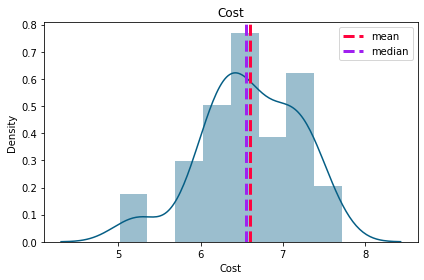

In [ ]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85');
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

### 6. Data Scaling

In [ ]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
51,Hitech Bawarchi Food Zone,6.216606,3.050,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
0,Beyond Flavours,6.685861,4.280,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
73,Driven Cafe,6.398595,3.745,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92,Collage - Hyatt Hyderabad Gachibowli,7.719130,3.410,5,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
54,Asian Meal Box,5.303305,2.580,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [ ]:
# print sample dataset
scaled_df.sample()

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
25,Tiki Shack,0.51796,-0.239508,-1.669272,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:

#applying pca to for the dimensionlty deduction

features = scaled_df.columns
features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])

PCA()

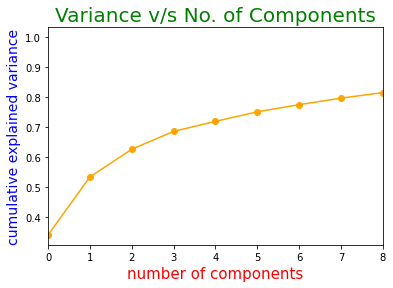

In [ ]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [ ]:
#using n_component as 3 
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34169724 0.19318921 0.09207771]
Cumulative variance explained by 3 principal components: 62.70%


In [ ]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 46)
transformed shape: (100, 3)


##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#from text vectorization

X = X_tfidf 
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9961, 6)

In [ ]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 15341)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 15341)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
#getting the value count for target class
vc = sentiment_df.Sentiment.value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Count'})

In [ ]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [ ]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

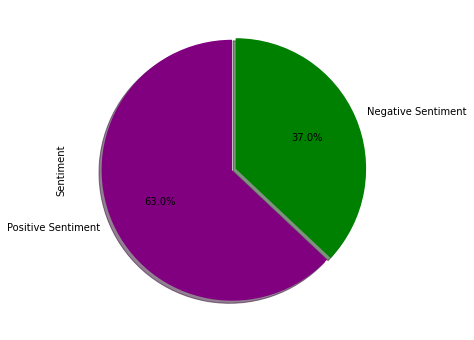

In [ ]:
# Dependant Variable Column Visualization
sentiment_df['Sentiment'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,
                                              labels=['Positive Sentiment','Negative Sentiment'],colors=['purple','green'],explode=[0.01,0.02])
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

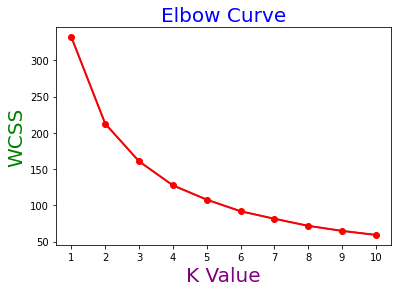

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 average silhouette_score is : 0.3131574210408015
For n_clusters = 3 average silhouette_score is : 0.2944780871242098


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 average silhouette_score is : 0.31238975452474504
For n_clusters = 5 average silhouette_score is : 0.306995563619912


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 average silhouette_score is : 0.31075799059042075
For n_clusters = 7 average silhouette_score is : 0.3135532827826133


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 average silhouette_score is : 0.3043695771946016
For n_clusters = 9 average silhouette_score is : 0.3131937975271868


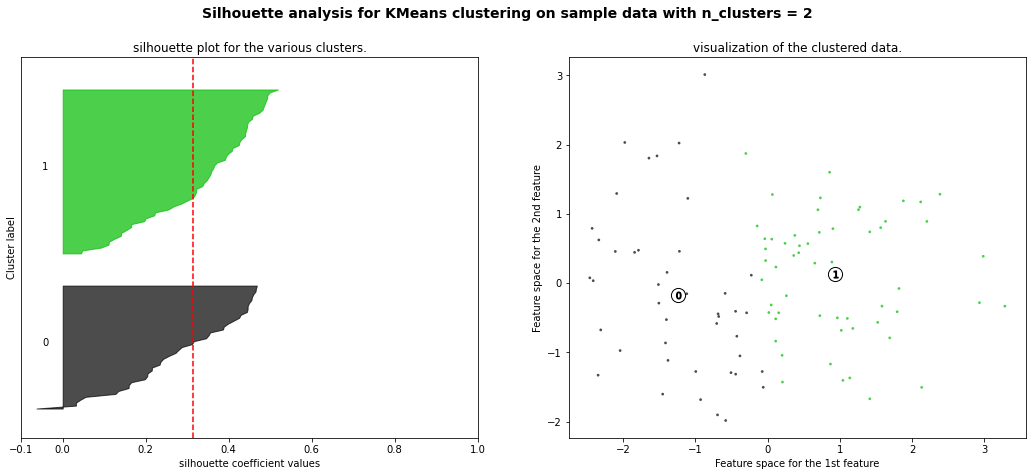

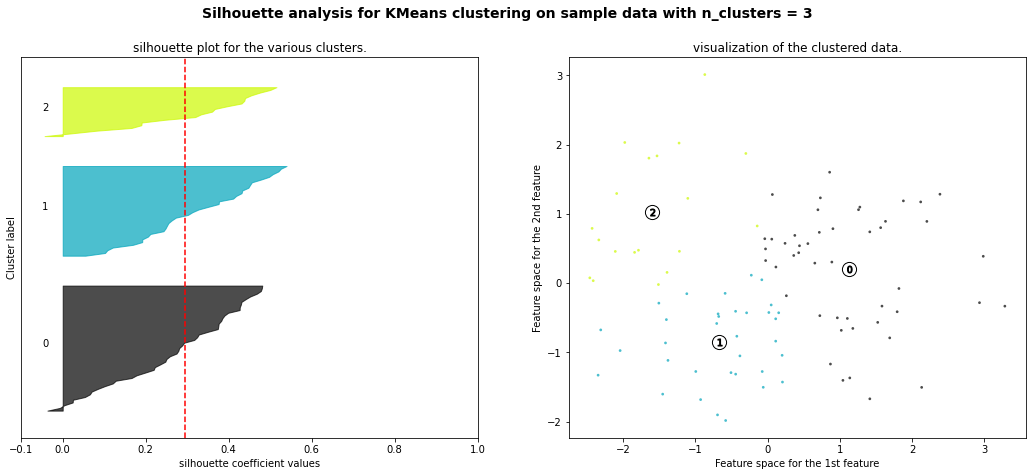

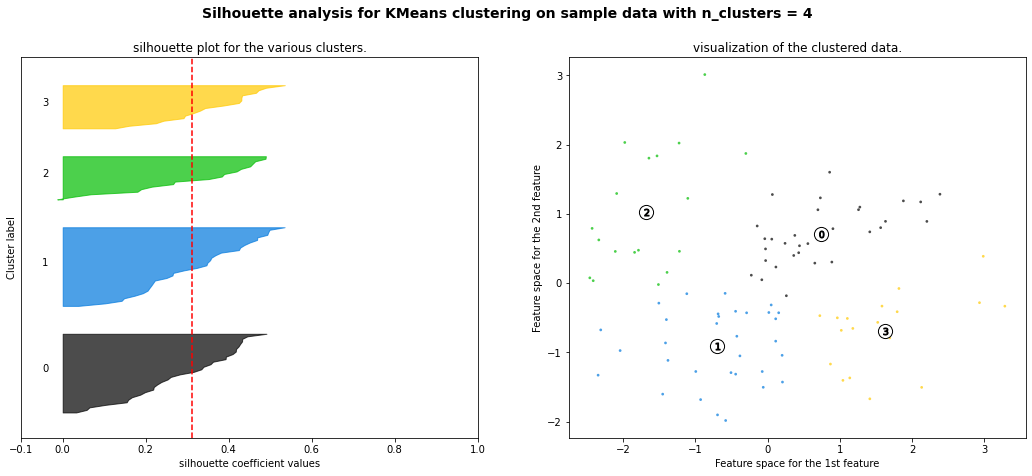

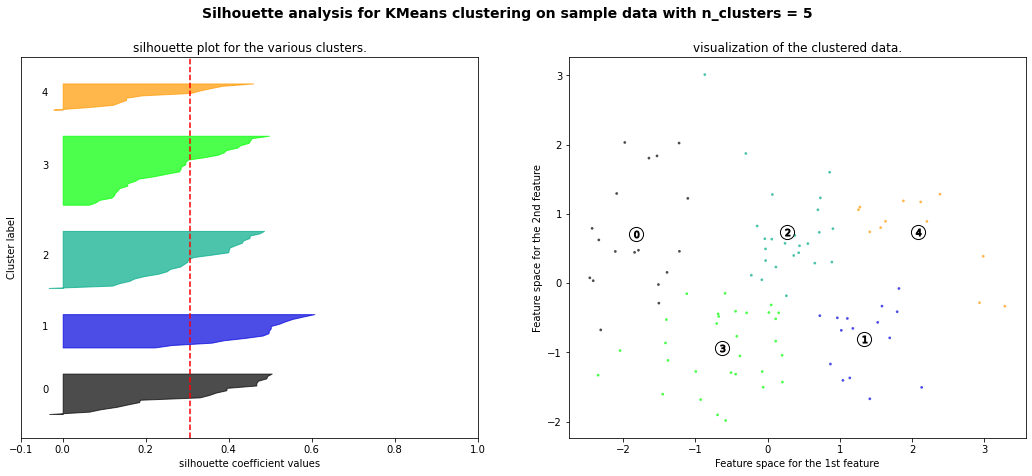

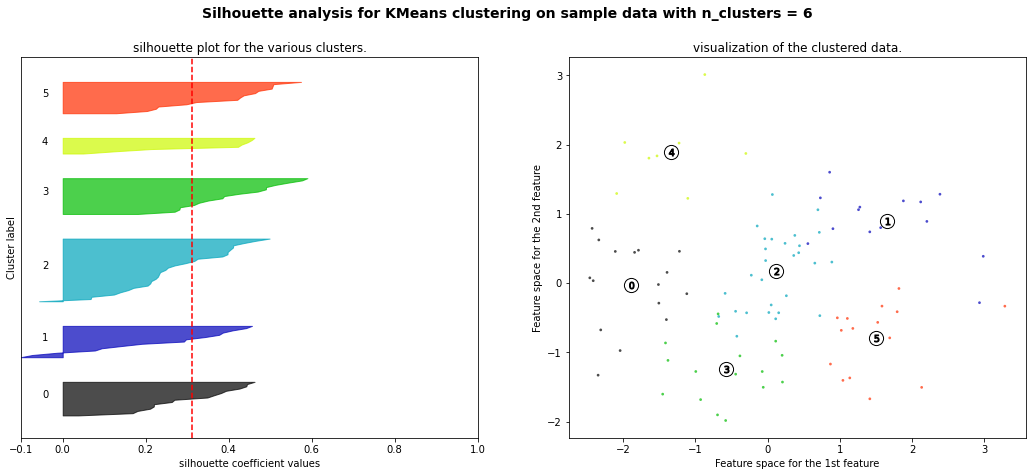

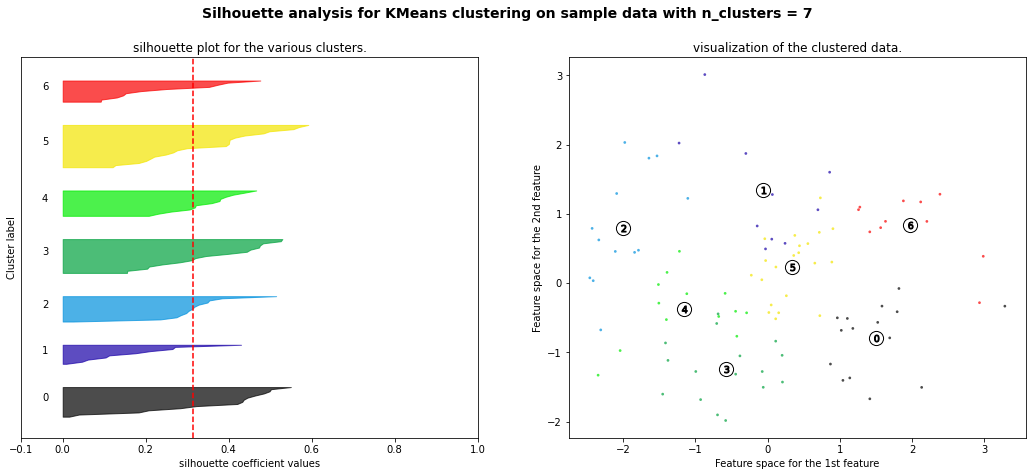

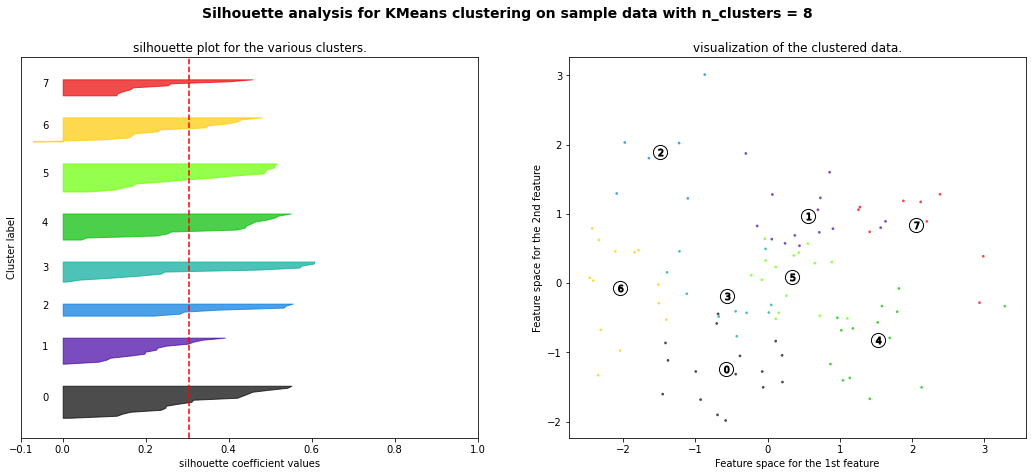

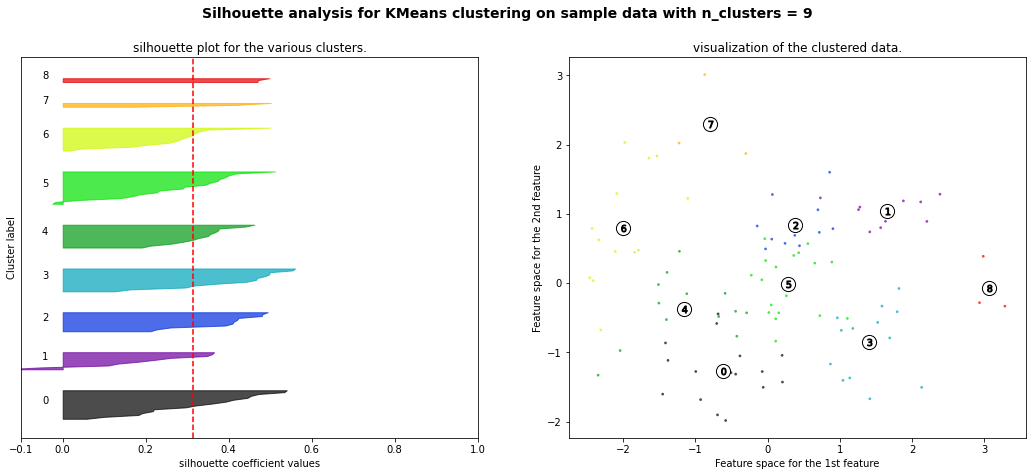

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
import matplotlib.cm as cm

# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


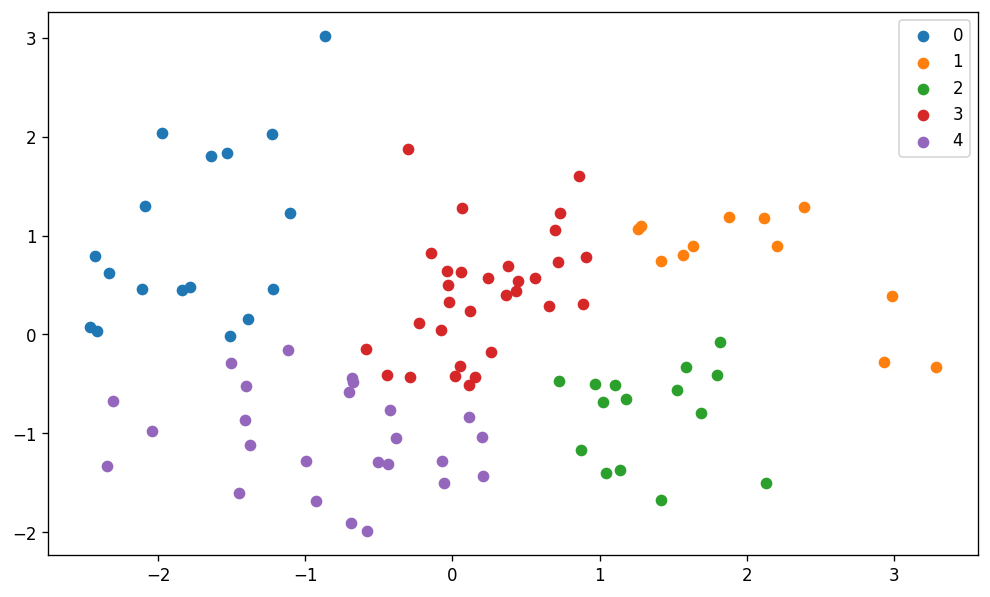

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
17,2.133999,-1.504994,-0.886775,2
59,1.415648,0.740876,2.088612,1


In [ ]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Chinese Pavilion,6.908755,3.745,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,NaN
Kritunga Restaurant,6.216606,3.470,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Zing's Northeast Kitchen,550.0,3.65,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
Khaan Saab,1100.0,3.80,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = resturent_df[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6,NaN
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,NaN
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4,NaN
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5,NaN
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5,NaN


In [ ]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant


In [ ]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
58,Tempteys,Beverages,350.0,3.850,2,NaN
74,Faasos,Biryani,600.0,3.030,3,NaN
93,Zing's Northeast Kitchen,Momos,550.0,3.650,2,NaN
78,Khaan Saab,North Indian,1100.0,3.800,2,NaN
87,American Wild Wings,Fast Food,600.0,3.865,4,NaN


In [ ]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : nan 

[] 



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

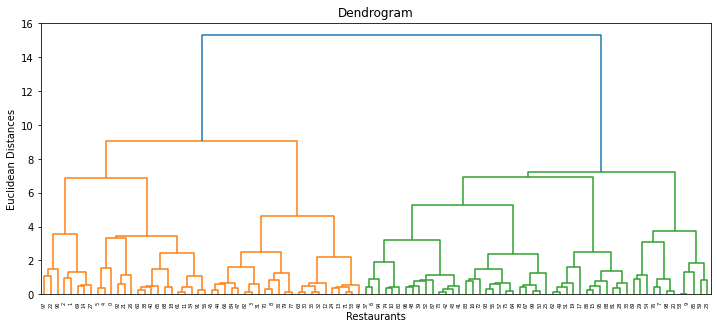

In [ ]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [ ]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2956373115574951
For n_clusters = 3, silhouette score is 0.2248300083366887
For n_clusters = 4, silhouette score is 0.20830889821051732
For n_clusters = 5, silhouette score is 0.24628280178066397
For n_clusters = 6, silhouette score is 0.27021411301776405
For n_clusters = 7, silhouette score is 0.26673247429646685
For n_clusters = 8, silhouette score is 0.28037605252034475
For n_clusters = 9, silhouette score is 0.28706963785796336
For n_clusters = 10, silhouette score is 0.2871341619269206
For n_clusters = 11, silhouette score is 0.2981397628070568
For n_clusters = 12, silhouette score is 0.3129672485485945
For n_clusters = 13, silhouette score is 0.31385473039020595
For n_clusters = 14, silhouette score is 0.3255791969968624
For n_clusters = 15, silhouette score is 0.33513227533507567


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

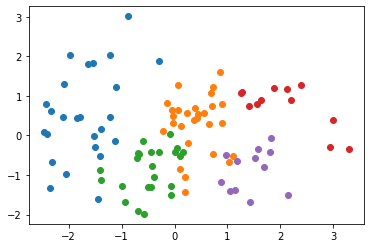

Silhouette Coefficient: 0.246
davies_bouldin_score 1.152


In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters 
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [ ]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc
clustering_result.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label,label_hr
12,Absolute Sizzlers,"Continental, American, Chinese",750.0,3.620,3,NaN,2
63,Dine O China,"Chinese, Asian, Momos",850.0,3.370,3,NaN,2
79,Olive Garden,"North Indian, Chinese, Continental, Biryani",700.0,3.760,4,NaN,2
83,GD's,"Burger, American",500.0,3.960,2,NaN,1
73,Driven Cafe,"Cafe, Fast Food, Beverages",600.0,3.745,3,NaN,1


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 2 Sentiment Analysis**

**Linear Discrimination Analysis**

In [ ]:
#Import pyldavis to visualise
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 18.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [ ]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


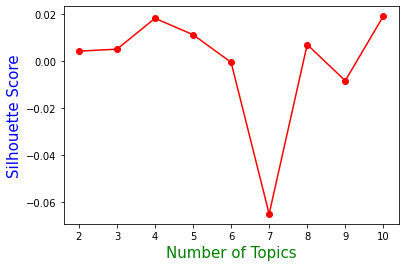

In [ ]:
#plotting silhouette score 
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [ ]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)

LatentDirichletAllocation(n_components=4)

In [ ]:
#using pyldavis to visualise
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:

def _get_vocab(vectorizer):
    return vectorizer.get_feature_names()

In [ ]:
# ploting the clusters top 30 terms 
lda_pyLDAvis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
lda_pyLDAvis

AttributeError: ignored

In [ ]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review_df[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()
     

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0.0,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0.0,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0.0,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0.0,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0.0,3.0,2.0,2019.0,5.0,21.0


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***